# CMS GIWAXS plotting notebook - plotting single images from loaded zarr datasets
# A1-3 Sample Set

## Imports

In [1]:
# Imports:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import xarray as xr
from tqdm.auto import tqdm

# Choose a colormap:
cmap = plt.cm.turbo
cmap.set_bad('black')

## Define & check paths

In [2]:
# I like pathlib for its readability & checkability, it's also necessary for the loadSeries function later on
# Replace the paths with the ones relevant to your data, you can use the ".exists()" method to make sure you defined a path correctly
propPath = pathlib.Path('/nsls2/data/cms/proposals/2023-2/pass-311415')  # The proposals path is a good place to store large data (>1 TB space?)
outPath = propPath.joinpath('AL_processed_data')

samplesPath = outPath.joinpath('ex_situ_zarrs')

## Single image GIWAXS plotting

In [3]:
# List the files inside a folder
sorted([f.name for f in samplesPath.iterdir()])  # a way to list just the filenames and not the whole path

['.ipynb_checkpoints',
 'caked_A1-3set-take2_waxs_stitched.zarr',
 'caked_A1-3set_waxs_stitched.zarr',
 'caked_PM6-Y6_waxs_stitched.zarr',
 'caked_PM6-Y6set_stitched.zarr',
 'caked_bladecoated_films_waxs_stitched.zarr',
 'raw_A1-3set-take2_waxs_stitched.zarr',
 'raw_A1-3set_waxs_stitched.zarr',
 'raw_PM6-Y6_waxs_stitched.zarr',
 'raw_PM6-Y6set_stitched.zarr',
 'raw_bladecoated_films_waxs_stitched.zarr',
 'recip_A1-3set-take2_waxs_stitched.zarr',
 'recip_A1-3set_waxs_stitched.zarr',
 'recip_PM6-Y6_waxs_stitched.zarr',
 'recip_PM6-Y6set_stitched.zarr',
 'recip_bladecoated_films_waxs_stitched.zarr']

### 2D plots

#### Caked Images

In [4]:
filename = 'caked_A1-3set_waxs_stitched.zarr'
DS = xr.open_zarr(samplesPath.joinpath(filename))
DS = DS.where(DS>1e-5)
DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116581  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116582  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116586  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116587  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116588  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    ...       ...
    1116628  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116629  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116630  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116634  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116635  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116636  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>

In [7]:
sin_chi_DA

<xarray.DataArray 'chi' (chi: 180)>
array([0.99996192, 0.99965732, 0.99904822, 0.9981348 , 0.99691733,
       0.9953962 , 0.99357185, 0.99144486, 0.98901586, 0.9862856 ,
       0.9832549 , 0.9799247 , 0.976296  , 0.97236991, 0.96814763,
       0.96363044, 0.95881972, 0.95371693, 0.94832364, 0.94264147,
       0.93667217, 0.93041754, 0.92387951, 0.91706005, 0.90996124,
       0.90258525, 0.89493432, 0.88701079, 0.87881707, 0.87035565,
       0.86162911, 0.85264011, 0.84339139, 0.83388576, 0.82412613,
       0.81411545, 0.80385679, 0.79335327, 0.78260808, 0.7716245 ,
       0.76040588, 0.74895563, 0.73727725, 0.72537428, 0.71325035,
       0.70090916, 0.68835447, 0.6755901 , 0.66261993, 0.64944793,
       0.6360781 , 0.62251451, 0.6087613 , 0.59482265, 0.58070282,
       0.56640609, 0.55193684, 0.53729946, 0.52249841, 0.5075382 ,
       0.4924234 , 0.47715859, 0.46174844, 0.44619764, 0.43051092,
       0.41469306, 0.39874888, 0.38268324, 0.36650103, 0.35020718,
       0.33380665, 0.31730444, 0.30070558, 0.28401512, 0.26723815,
       0.25037978, 0.23344513, 0.21643938, 0.19936769, 0.18223528,
       0.16504736, 0.14780916, 0.13052594, 0.11320295, 0.09584549,
       0.07845883, 0.06104827, 0.04361911, 0.02617667, 0.00872626,
       0.00872682, 0.02617723, 0.04361968, 0.06104883, 0.07845939,
       0.09584605, 0.11320351, 0.13052649, 0.14780972, 0.16504791,
       0.18223583, 0.19936824, 0.21643993, 0.23344568, 0.25038032,
       0.26723869, 0.28401566, 0.30070612, 0.31730498, 0.33380718,
       0.3502077 , 0.36650155, 0.38268376, 0.39874939, 0.41469357,
       0.43051142, 0.44619814, 0.46174894, 0.47715909, 0.49242388,
       0.50753869, 0.52249889, 0.53729993, 0.55193731, 0.56640656,
       0.58070327, 0.5948231 , 0.60876174, 0.62251495, 0.63607853,
       0.64944836, 0.66262036, 0.67559051, 0.68835488, 0.70090956,
       0.71325075, 0.72537466, 0.73727763, 0.74895601, 0.76040625,
       0.77162486, 0.78260843, 0.79335361, 0.80385713, 0.81411578,
       0.82412645, 0.83388607, 0.84339169, 0.85264041, 0.8616294 ,
       0.87035593, 0.87881734, 0.88701105, 0.89493458, 0.90258549,
       0.90996147, 0.91706027, 0.92387972, 0.93041775, 0.93667236,
       0.94264166, 0.94832382, 0.9537171 , 0.95881988, 0.96363059,
       0.96814777, 0.97237004, 0.97629612, 0.97992481, 0.983255  ,
       0.98628569, 0.98901594, 0.99144493, 0.99357192, 0.99539625,
       0.99691738, 0.99813483, 0.99904825, 0.99965734, 0.99996193])
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Attributes:
    units:    °

In [10]:
# How one could apply a sin chi correction
sin_chi_DA = np.sin(np.radians(np.abs(DS.chi)))
# sin_chi_DA

corr_DS = DS.copy()
# corr_DS = corr_DS * sin_chi_DA

for var in corr_DS.data_vars:
    corrected = corr_DS[var] * sin_chi_DA
    corr_DS[var].values = corrected.values
    
corr_DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116581  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116582  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116586  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116587  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116588  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    1116628  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116629  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116630  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116634  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116635  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116636  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [11]:
# A way to select dataarrays based on attribute values:
selected_raw_DAs = [da for da in DS.data_vars.values() if 
                # da.attrs['incident_angle'] == 'th0.140' and 
                da.attrs['film'] in ['A1', 'A2', 'A3']]

selected_corr_DAs = [da for da in corr_DS.data_vars.values() if 
                # da.attrs['incident_angle'] == 'th0.140' and 
                da.attrs['film'] in ['A1', 'A2', 'A3']]

print(len(selected_raw_DAs))
print(len(selected_corr_DAs))

9
9


  0%|          | 0/9 [00:00<?, ?it/s]

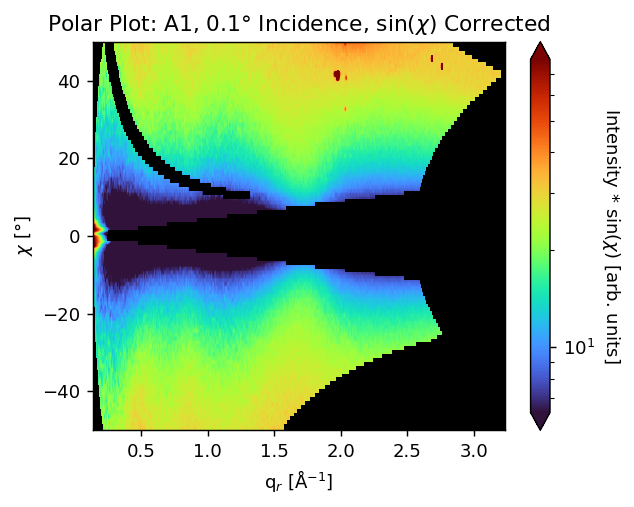

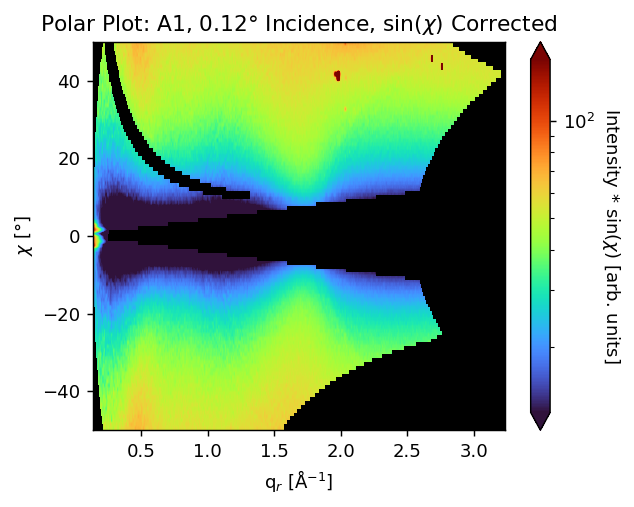

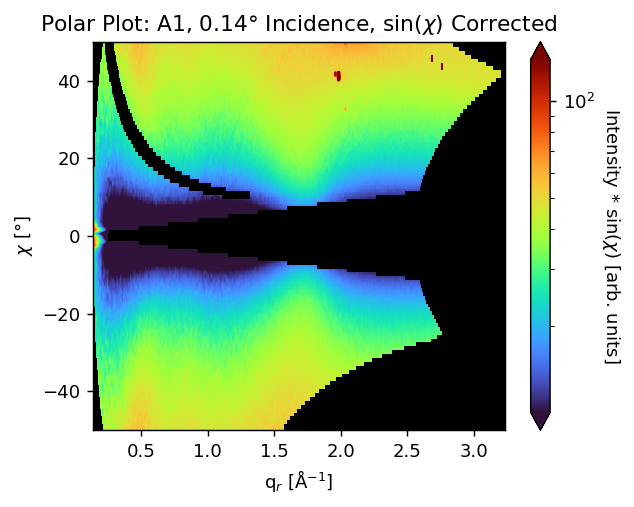

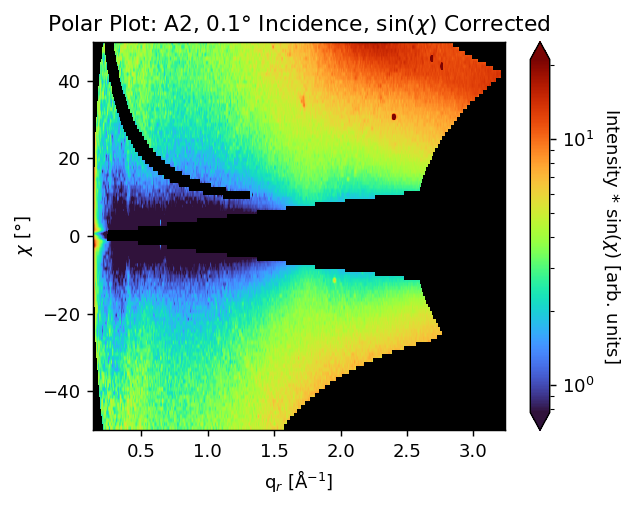

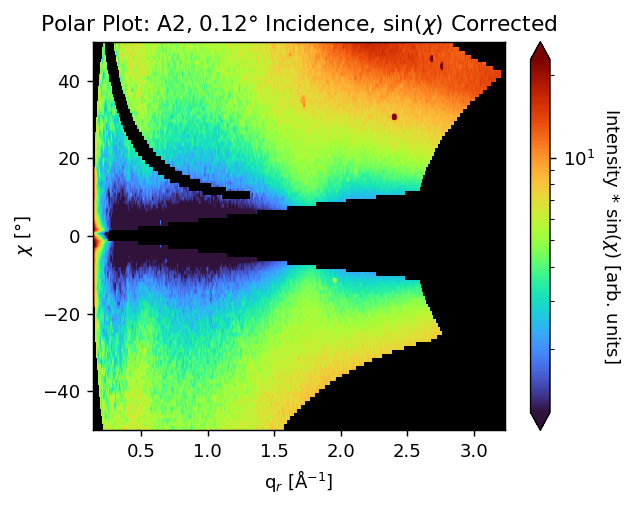

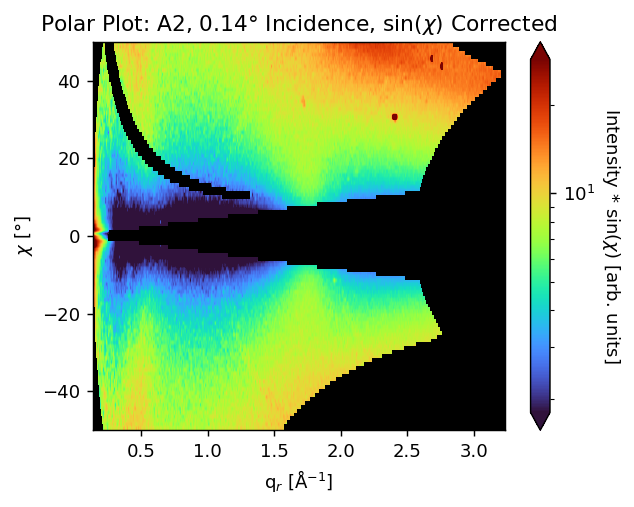

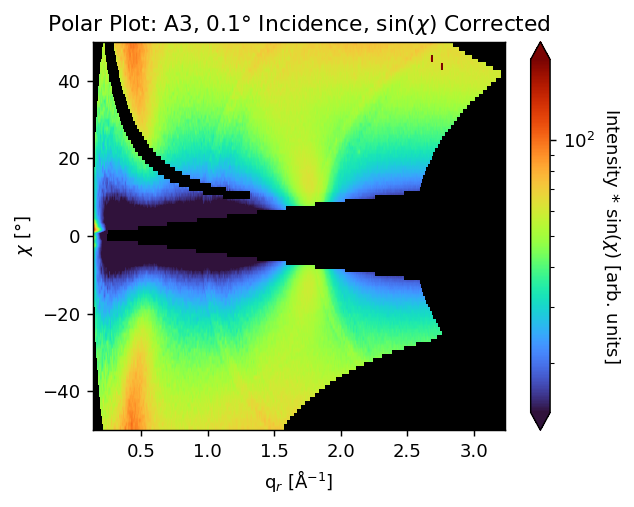

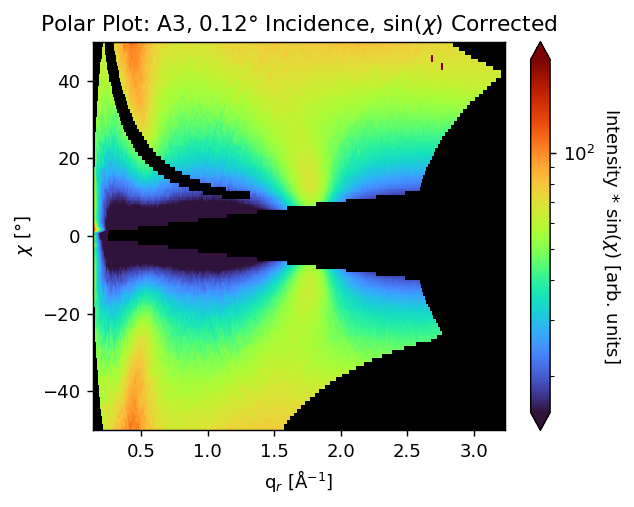

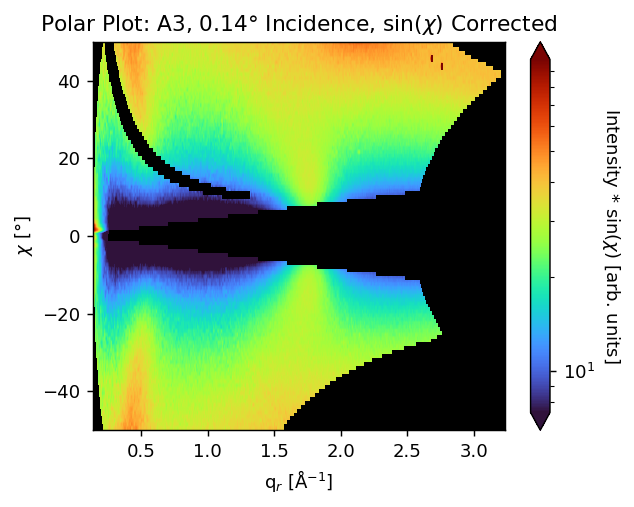

In [70]:
# Plot and optionally save selected dataarrays:
# Set chi range: Full range
chi_min = -50
chi_max = 50

intensity_type = 'corr'

if intensity_type == 'raw':
    selected_DAs = selected_raw_DAs
elif intensity_type == 'corr':
    selected_DAs = selected_corr_DAs
    
for DA in tqdm(selected_DAs):
    # Slice dataarray to select plotting region 
    sliced_DA = DA.sel(chi=slice(chi_min,chi_max))
    
    if intensity_type == 'raw':
        # Good cmin/cmax code for raw data
        cmin = float(sliced_DA.sel(chi=slice(-18,-8), qr=slice(0.3, 2.1)).compute().quantile(1e-3))  # Set color minimum value, based on quantile 
        cmax = float(sliced_DA.sel(chi=slice(-18,-8), qr=slice(0.3, 2.1)).compute().quantile(1-1e-6))  # Set color maximum value, based on quantile
    elif intensity_type == 'corr':
        # Good cmin/cmax code for corr data
        cmin = float(sliced_DA.sel(chi=slice(-30,-8), qr=slice(0.6, 2.1)).compute().quantile(1e-2))  # Set color minimum value, based on quantile 
        cmax = float(sliced_DA.sel(chi=slice(-30,-8), qr=slice(0.6, 2.1)).compute().quantile(1))*3  # Set color maximum value, based on quantile
    
    
    # Plot sliced dataarray
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), figsize=(5,4), interpolation='antialiased')  # plot, optional parameter interpolation='antialiased' for image smoothing
    if intensity_type == 'corr':
        ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence, sin($\chi$) Corrected')
        ax.colorbar.set_label('Intensity * sin($\chi$) [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    elif intensity_type == 'raw':
        ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence, Raw Intensity')
        ax.colorbar.set_label('Raw Intensity [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    ax.axes.set(xlabel='q$_r$ [Å$^{-1}$]', ylabel='$\chi$ [°]')  # set title, axis labels, misc
    ax.figure.set(tight_layout=True, dpi=130)  # Adjust figure dpi & plotting style
    
    plt.show()  # Comment to mute plotting output
    
    # Uncomment below line and set savepath/savename for saving plots, I usually like to check 
    ax.figure.savefig(outPath.joinpath('A1-3set_waxs/oct2023_2d_plots', f'polar-2D_{DA.film}_{intensity_type}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')

  0%|          | 0/10 [00:00<?, ?it/s]

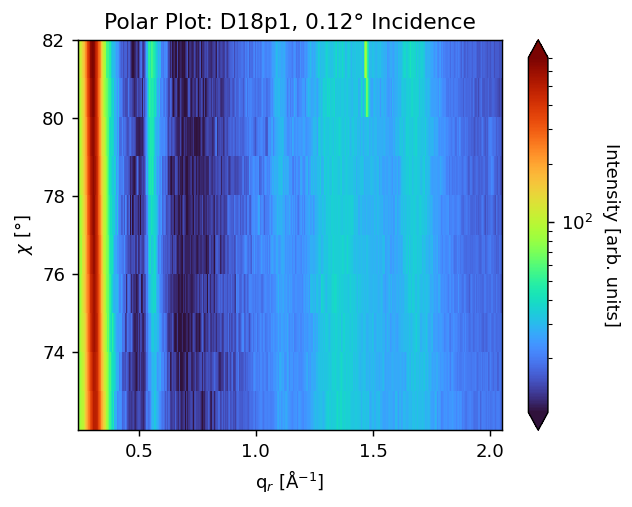

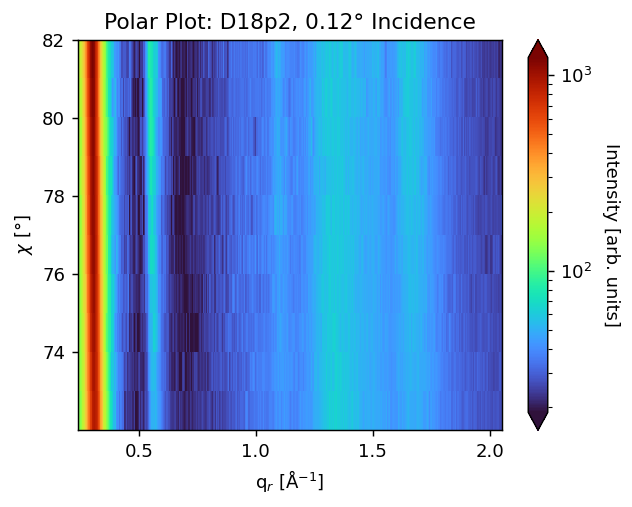

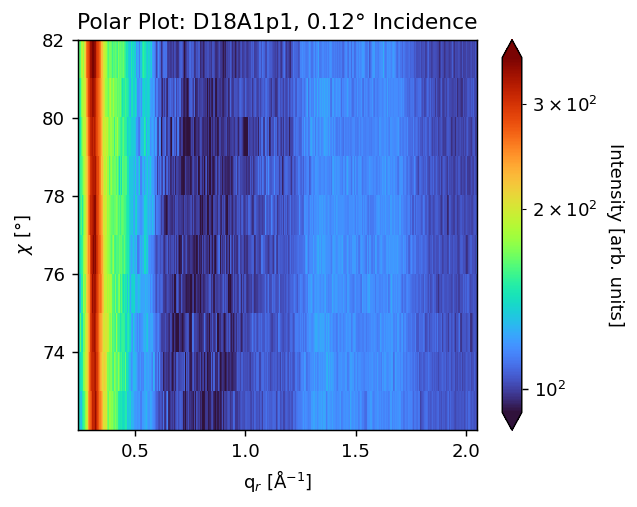

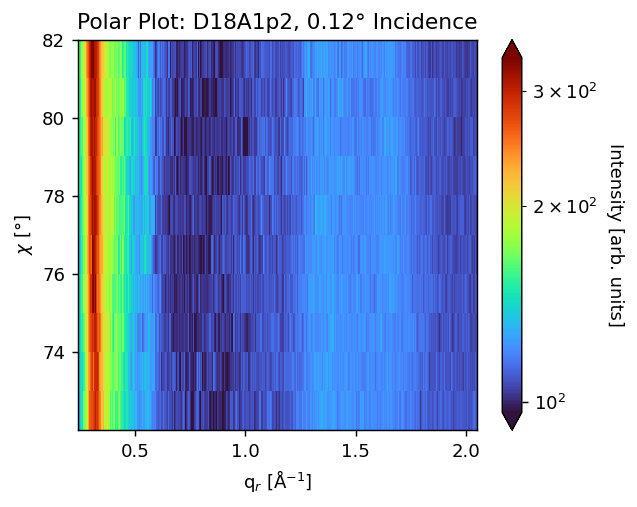

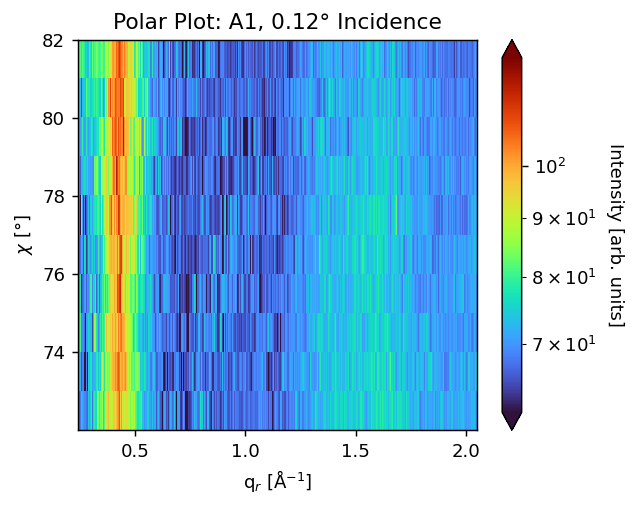

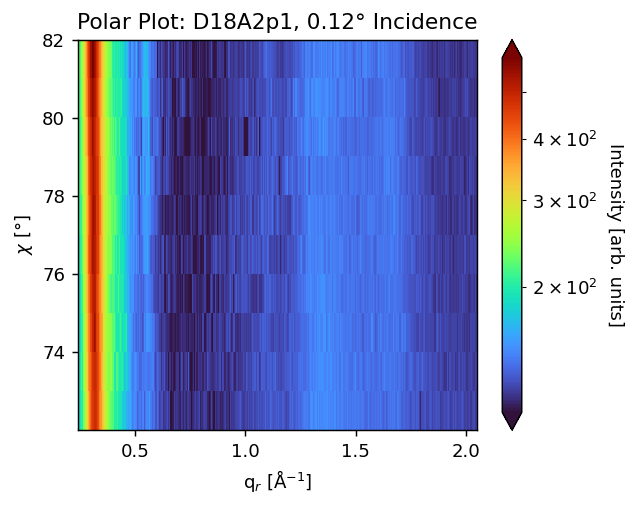

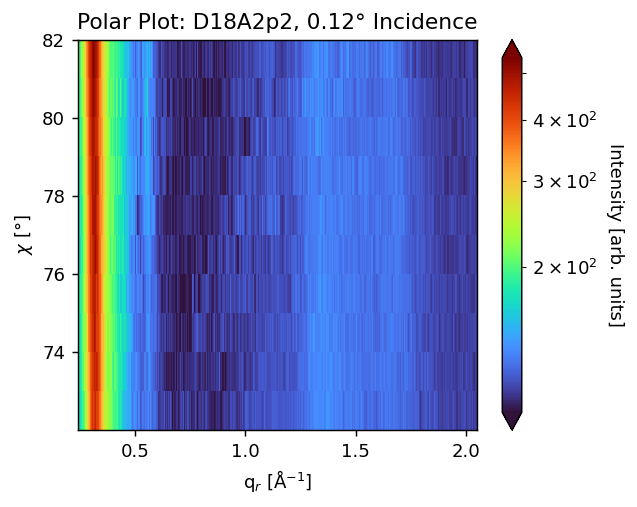

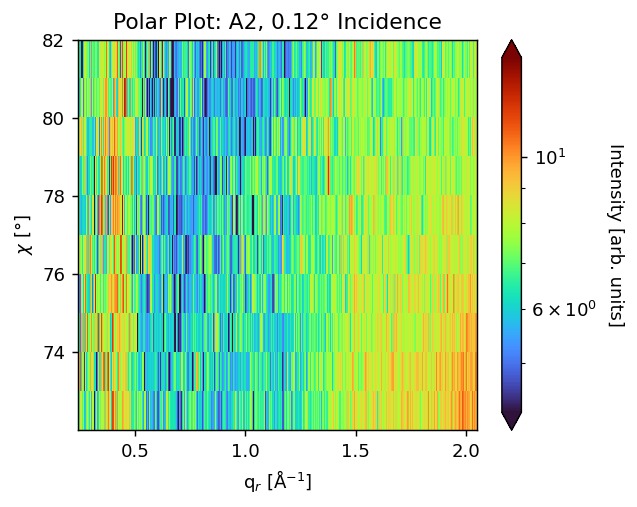

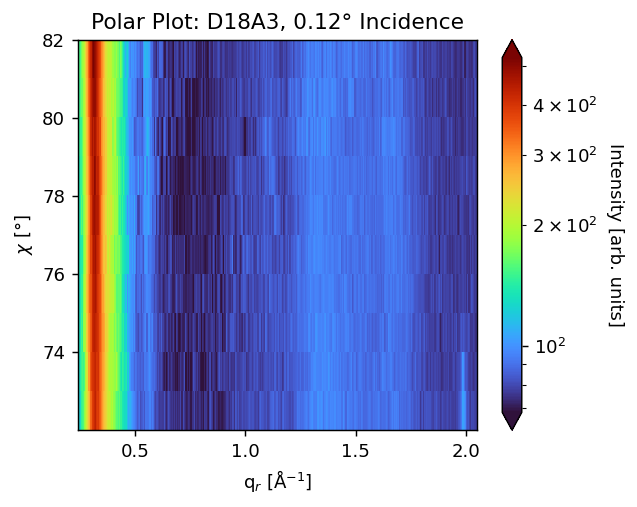

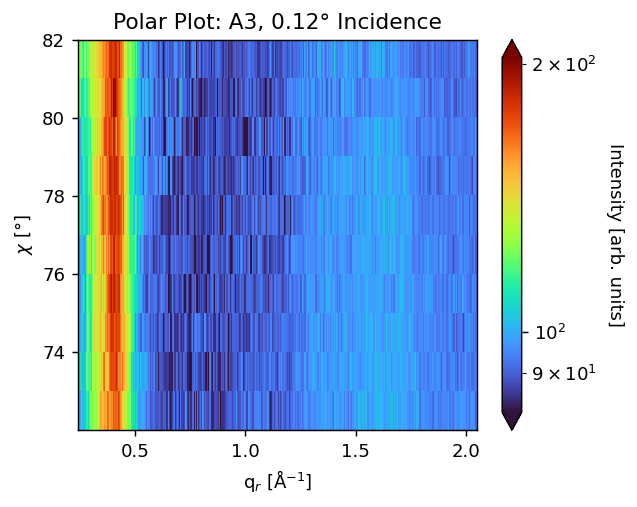

In [12]:
# Plot and optionally save selected dataarrays:
# Set chi range: In plane slice, choose a smooth section without detector gap/edge effects
chi_min = 72
chi_max = 82

for DA in tqdm(selected_DAs):
    # Slice dataarray to select plotting region 
    sliced_DA = DA.sel(chi=slice(chi_min,chi_max), qr=slice(0.24,2.05))
    cmin = float(sliced_DA.compute().quantile(1e-2))  # Set color minimum value, based on quantile 
    cmax = float(sliced_DA.compute().quantile(1-1e-6))  # Set color maximum value, based on quantile
    
    # Plot sliced dataarray
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), figsize=(5,4))  # plot
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_r$ [Å$^{-1}$]', ylabel='$\chi$ [°]')  # set title, axis labels, misc
    ax.figure.set(tight_layout=True, dpi=130)  # Adjust figure dpi & plotting style
    
    plt.show()  # Comment to mute plotting output
    
    # Uncomment below line and set savepath/savename for saving plots, I usually like to check 
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'polar-2D_{DA.sample_id}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')

  0%|          | 0/10 [00:00<?, ?it/s]

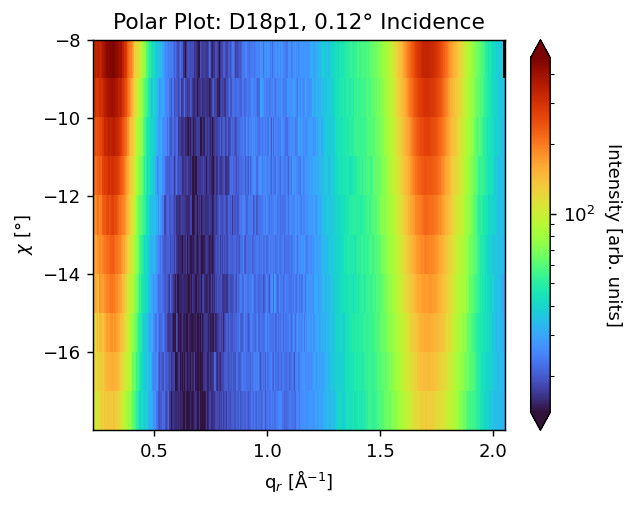

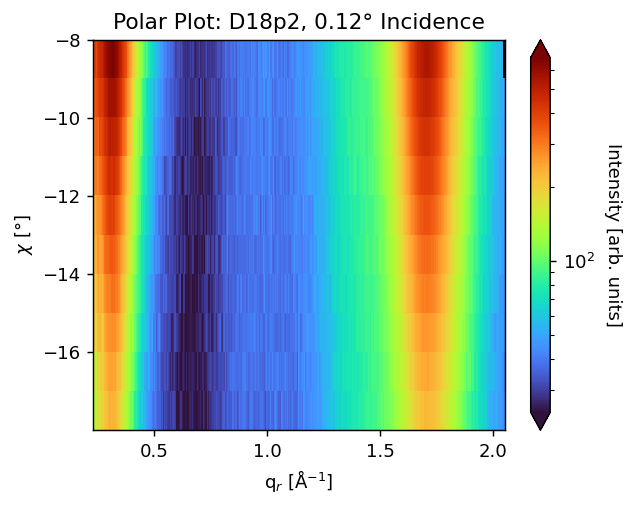

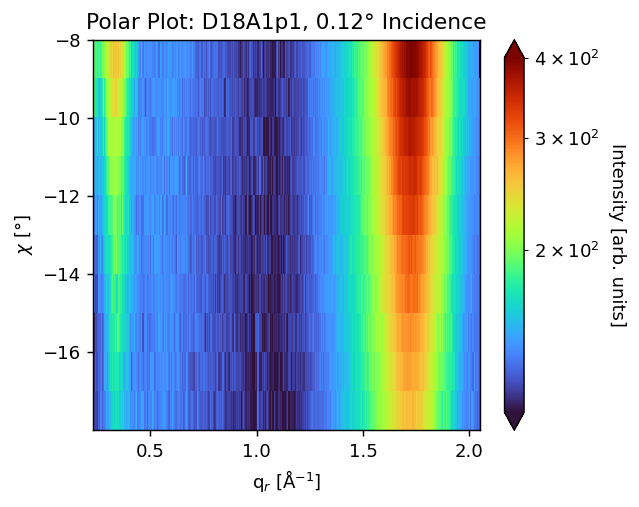

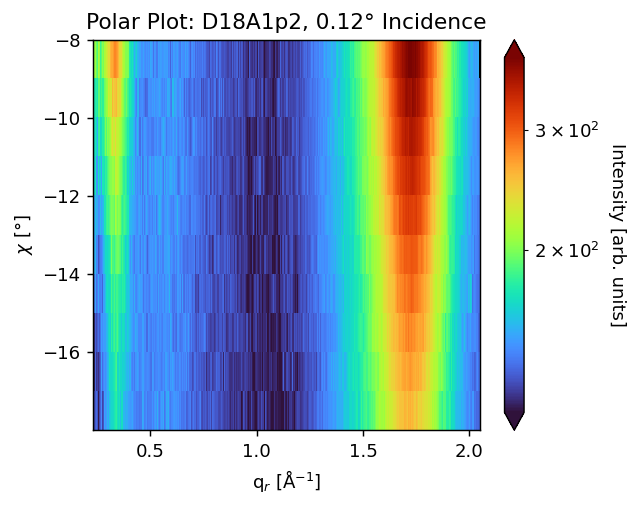

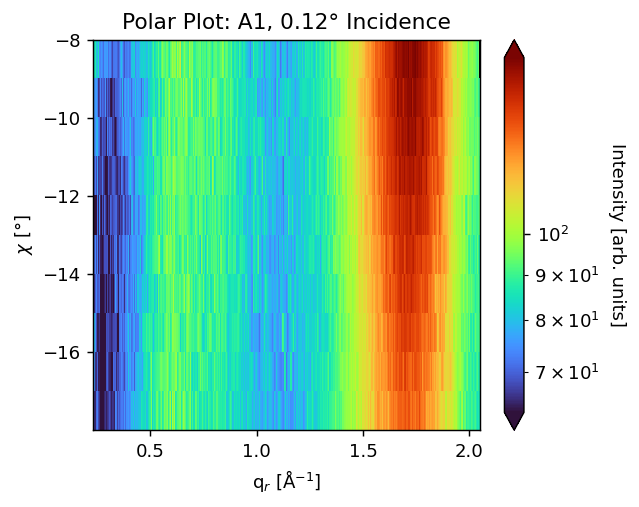

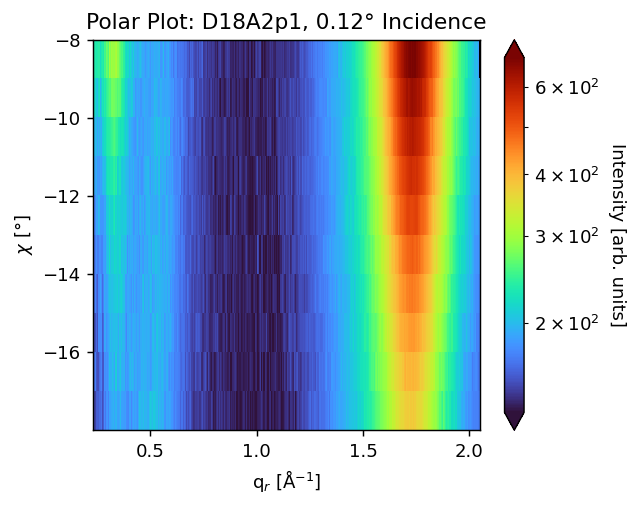

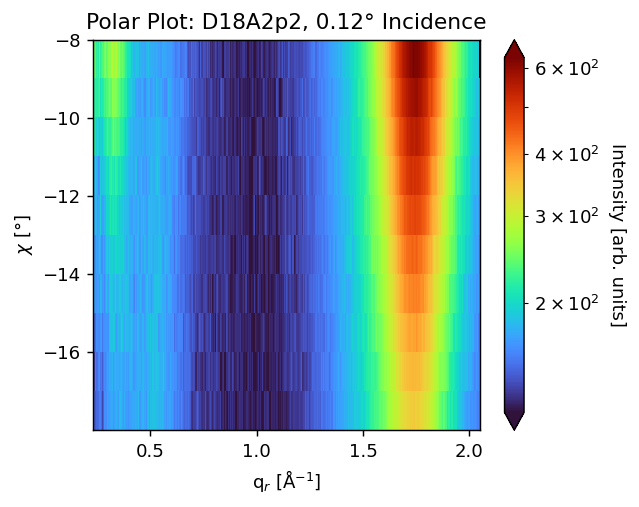

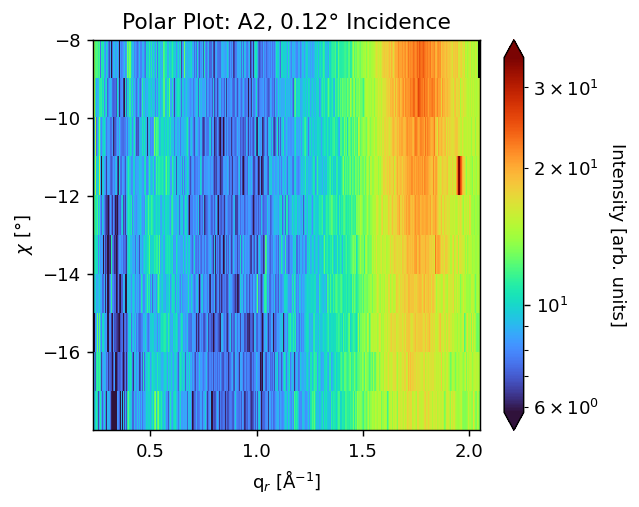

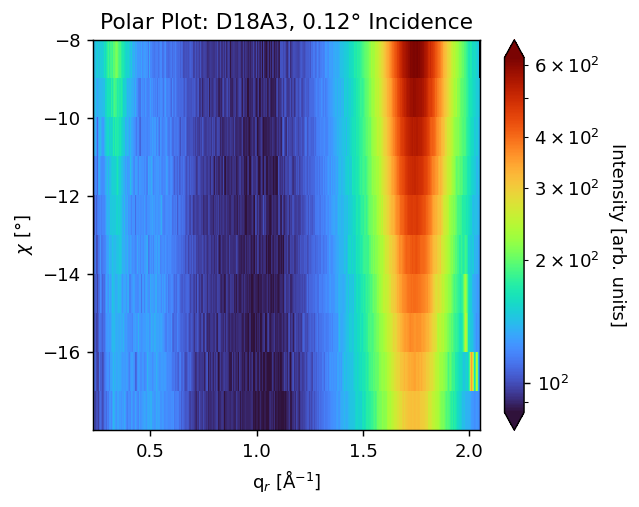

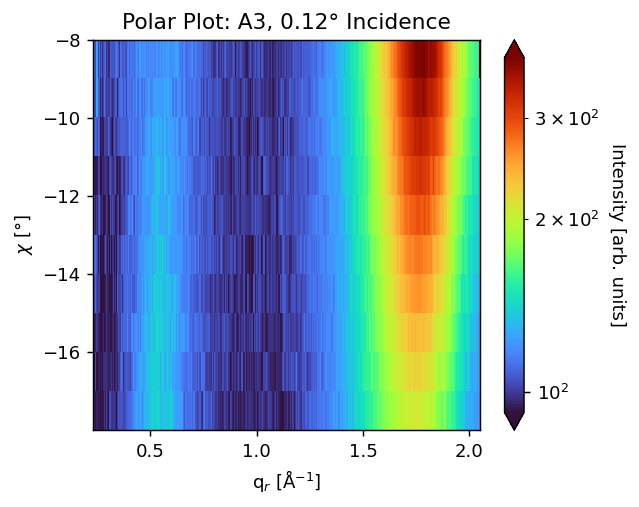

In [13]:
# Plot and optionally save selected dataarrays:
# Set chi range: In plane slice, choose a smooth section without detector gap/edge effects
chi_min = -18
chi_max = -8

for DA in tqdm(selected_DAs):
    # Slice dataarray to select plotting region 
    sliced_DA = DA.sel(chi=slice(chi_min,chi_max), qr=slice(0.23,2.05))
    cmin = float(sliced_DA.compute().quantile(1e-2))  # Set color minimum value, based on quantile 
    cmax = float(sliced_DA.compute().quantile(1-1e-6))  # Set color maximum value, based on quantile
    
    # Plot sliced dataarray
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), figsize=(5,4))  # plot
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)  # set colorbar label & parameters 
    ax.axes.set(title=f'Polar Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_r$ [Å$^{-1}$]', ylabel='$\chi$ [°]')  # set title, axis labels, misc
    ax.figure.set(tight_layout=True, dpi=130)  # Adjust figure dpi & plotting style
    
    plt.show()  # Comment to mute plotting output
    
    # Uncomment below line and set savepath/savename for saving plots, I usually like to check 
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'polar-2D_{DA.sample_id}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')

In [9]:
# # A way to save data as csv files  
# for DA in DS.data_vars.values():
#     # qr columns, chi rows
#     DA.to_pandas().to_csv(outPath.joinpath('PM6-Y6_waxs', f'polar-2D_{DA.polymer}-{DA.weight_percent}_{DA.incident_angle}_{DA.scan_id}.csv'))

#### Reciprocal Space Images

In [14]:
[f.name for f in samplesPath.iterdir()]

['raw_bladecoated_films_waxs_stitched.zarr',
 'caked_A1-3set_waxs_stitched.zarr',
 'raw_A1-3set-take2_waxs_stitched.zarr',
 'raw_PM6-Y6_waxs_stitched.zarr',
 'caked_PM6-Y6set_stitched.zarr',
 'caked_PM6-Y6_waxs_stitched.zarr',
 'raw_PM6-Y6set_stitched.zarr',
 'raw_A1-3set_waxs_stitched.zarr',
 'recip_PM6-Y6_waxs_stitched.zarr',
 '.ipynb_checkpoints',
 'recip_PM6-Y6set_stitched.zarr',
 'caked_bladecoated_films_waxs_stitched.zarr',
 'caked_A1-3set-take2_waxs_stitched.zarr',
 'recip_bladecoated_films_waxs_stitched.zarr',
 'recip_A1-3set_waxs_stitched.zarr',
 'recip_A1-3set-take2_waxs_stitched.zarr']

In [15]:
filename = 'recip_A1-3set_waxs_stitched.zarr'
DS = xr.open_zarr(samplesPath.joinpath(filename))
DS = DS.where(DS>0)
DS

<xarray.Dataset>
Dimensions:  (q_z: 1043, q_xy: 981)
Coordinates:
  * q_xy     (q_xy) float64 -1.219 -1.215 -1.212 -1.209 ... 2.171 2.175 2.178
  * q_z      (q_z) float64 0.007275 0.009704 0.01213 ... 2.534 2.537 2.539
Data variables: (12/30)
    1116580  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116581  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116582  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116586  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116587  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116588  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    ...       ...
    1116628  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116629  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116630  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116634  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116635  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>
    1116636  (q_z, q_xy) float64 dask.array<chunksize=(261, 246), meta=np.ndarray>

In [16]:
selected_DAs = [da for da in DS.data_vars.values() if 
                da.attrs['incident_angle'] == 'th0.120']
len(selected_DAs)

10

  0%|          | 0/10 [00:00<?, ?it/s]

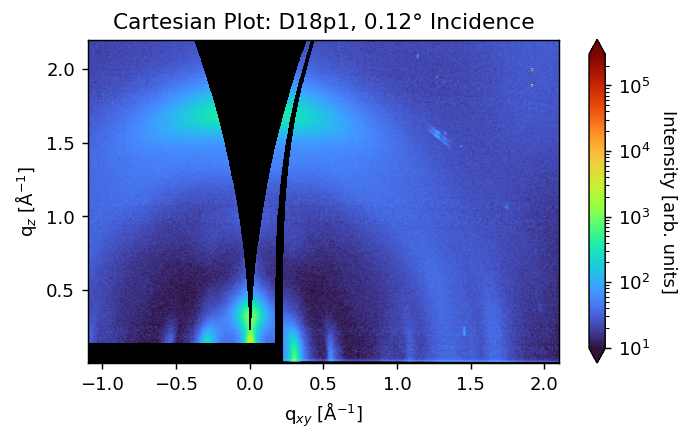

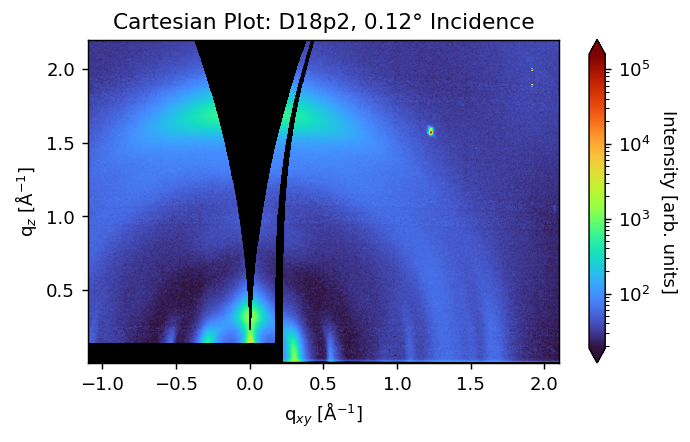

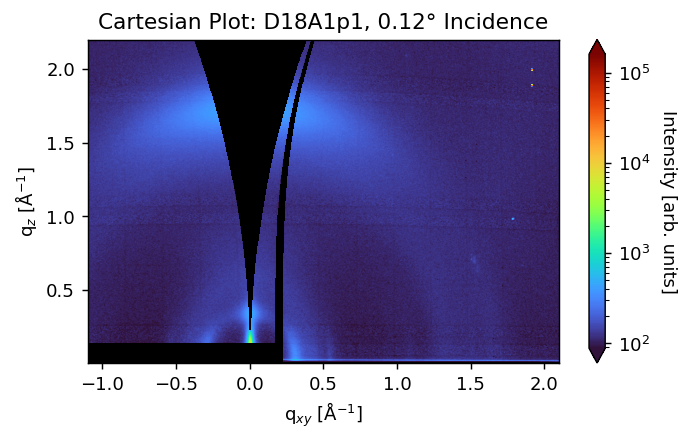

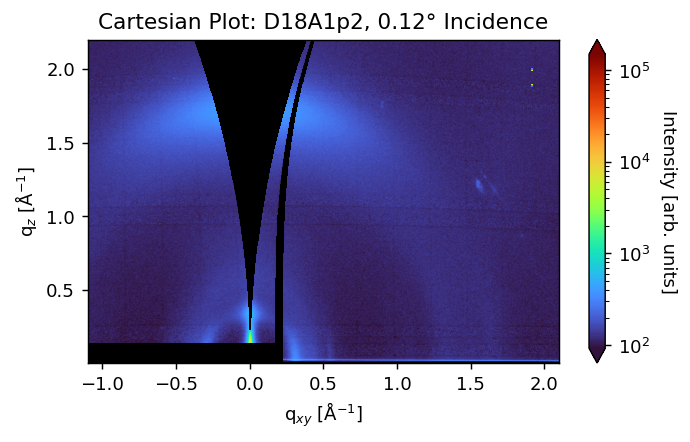

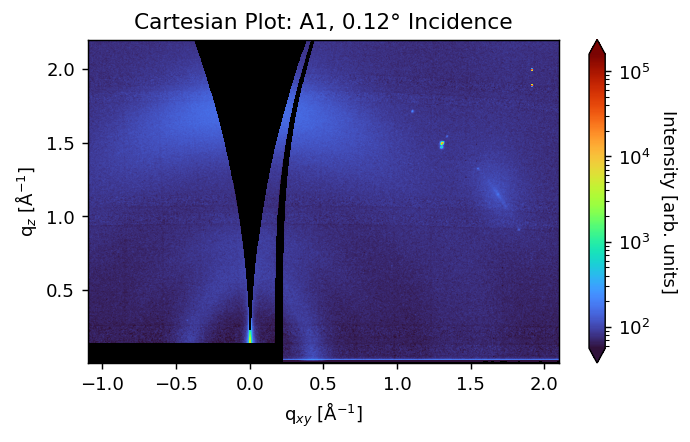

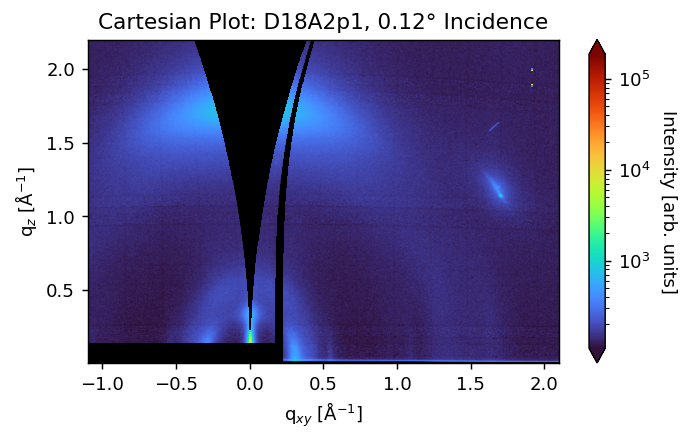

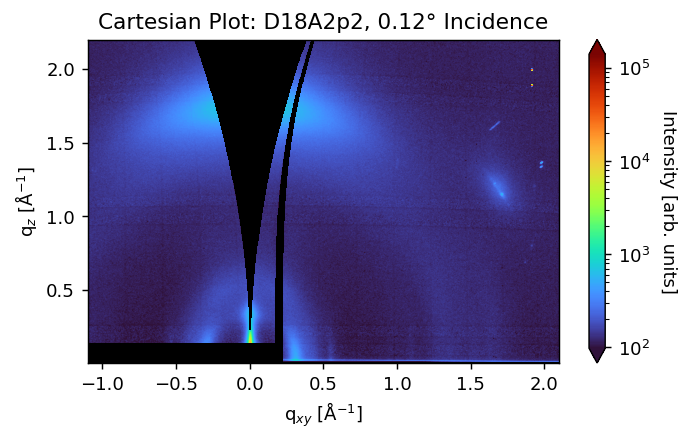

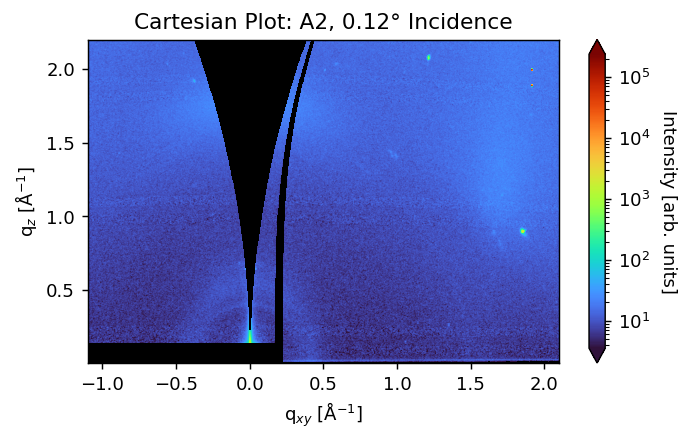

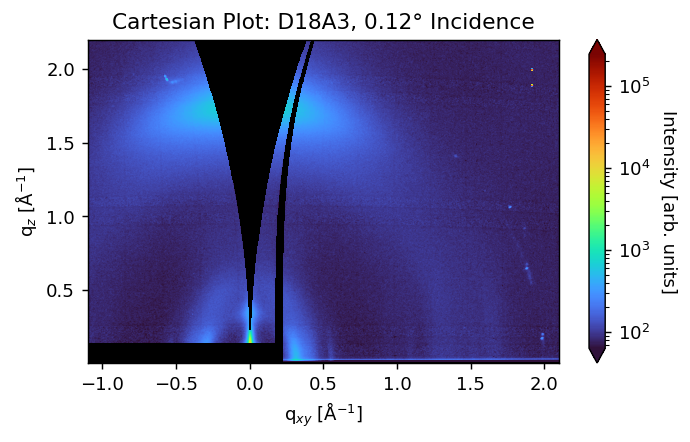

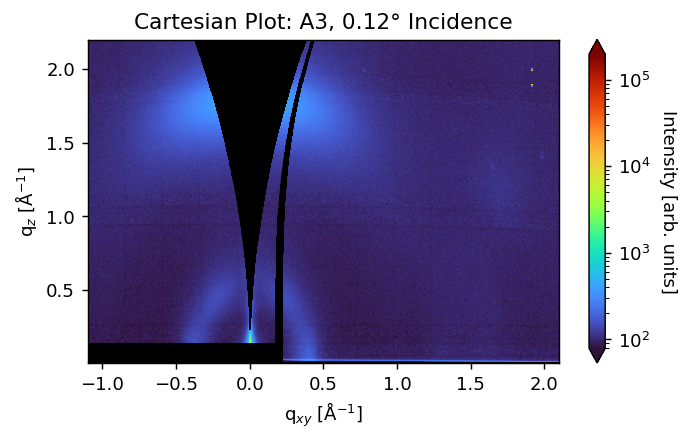

In [17]:
# Plot & optionally save each selected polymer:-{DA.weight_percent}
for DA in tqdm(selected_DAs):
    # Slice data for selected q ranges (will need to rename q_xy if dimensions are differently named)
    sliced_DA = DA.sel(q_xy=slice(-1.1, 2.1), q_z=slice(0, 2.2))
    cmin = float(sliced_DA.compute().quantile(1e-2))
    cmax = float(sliced_DA.compute().quantile(1-1e-8))   
    
    # Same plotting procedure as above
    ax = sliced_DA.plot.imshow(cmap=cmap, norm=LogNorm(cmin, cmax), interpolation='antialiased', figsize=(5.5,3.3))
    ax.colorbar.set_label('Intensity [arb. units]', rotation=270, labelpad=15)
    ax.axes.set(aspect='equal', title=f'Cartesian Plot: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
                xlabel='q$_{xy}$ [Å$^{-1}$]', ylabel='q$_z$ [Å$^{-1}$]')
    ax.figure.set(tight_layout=True, dpi=130)
    
    # ax.figure.savefig(outPath.joinpath('PM6-Y6set_waxs', f'cartesian-2D_{DA.sample_id}_{DA.incident_angle}.png'), dpi=150)
    plt.show()
    plt.close('all')

In [13]:
# # A way to save data as csv files
# for DA in tqdm(DS.data_vars.values()):
#     # qxy columns, qz rows
#     DA.to_pandas().to_csv(outPath.joinpath('PM6-Y6_waxs', f'cartesian-2D_{DA.polymer}-{DA.weight_percent}_{DA.incident_angle}_{DA.scan_id}.csv'))

### 1D Plots

In [4]:
filename = 'caked_A1-3set_waxs_stitched.zarr'
DS = xr.open_zarr(samplesPath.joinpath(filename))
DS = DS.where(DS>1e-5)
DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116581  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116582  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116586  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116587  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116588  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    ...       ...
    1116628  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116629  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116630  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116634  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116635  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>
    1116636  (chi, qr) float64 dask.array<chunksize=(90, 500), meta=np.ndarray>

In [5]:
# How one could apply a sin chi correction
sin_chi_DA = np.sin(np.radians(np.abs(DS.chi)))
# sin_chi_DA

corr_DS = DS.copy()
for var in corr_DS.data_vars:
    corrected = corr_DS[var] * sin_chi_DA
    corr_DS[var].values = corrected.values
    
corr_DS

<xarray.Dataset>
Dimensions:  (chi: 180, qr: 1000)
Coordinates:
  * chi      (chi) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * qr       (qr) float64 0.1393 0.1424 0.1455 0.1486 ... 3.226 3.229 3.232
Data variables: (12/30)
    1116580  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116581  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116582  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116586  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116587  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116588  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    1116628  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116629  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116630  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116634  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116635  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    1116636  (chi, qr) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [136]:
selected_raw_DAs = [da for da in DS.data_vars.values() if 
                da.attrs['incident_angle'] == 'th0.100' and 
                da.attrs['film'] in ['A1', 'A2', 'A3']]
len(selected_raw_DAs)

3

In [137]:
selected_corr_DAs = [da for da in corr_DS.data_vars.values() if 
                da.attrs['incident_angle'] == 'th0.100' and 
                da.attrs['film'] in ['A1', 'A2', 'A3']]
len(selected_corr_DAs)

3

  0%|          | 0/3 [00:00<?, ?it/s]

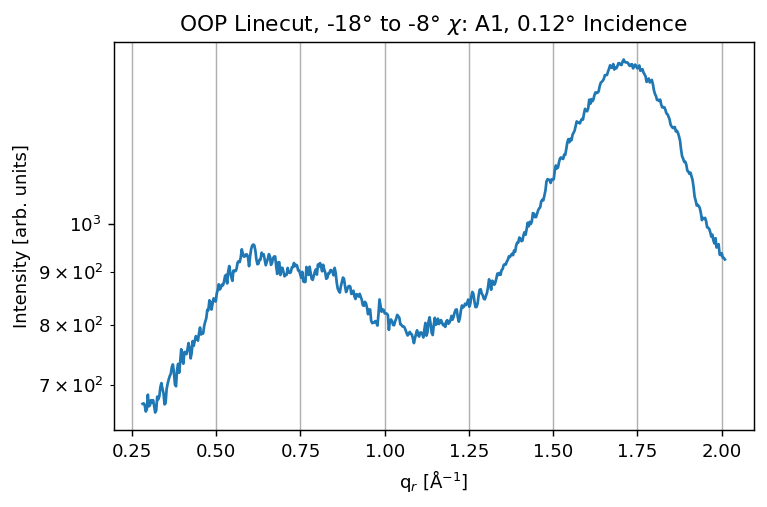

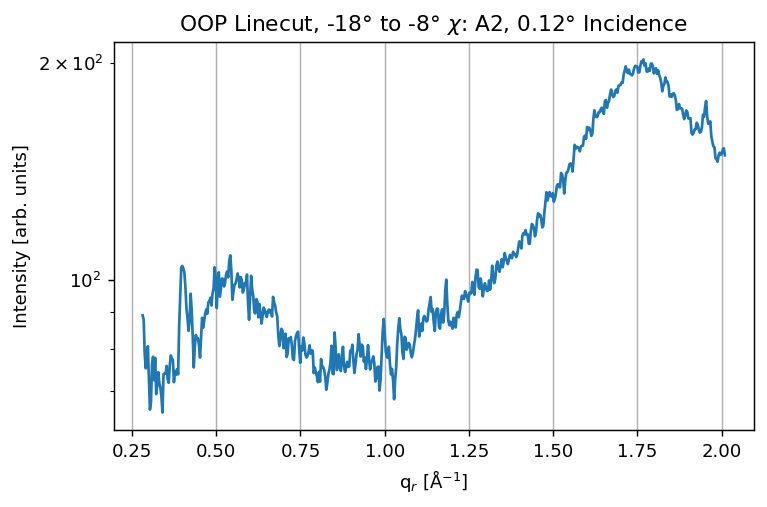

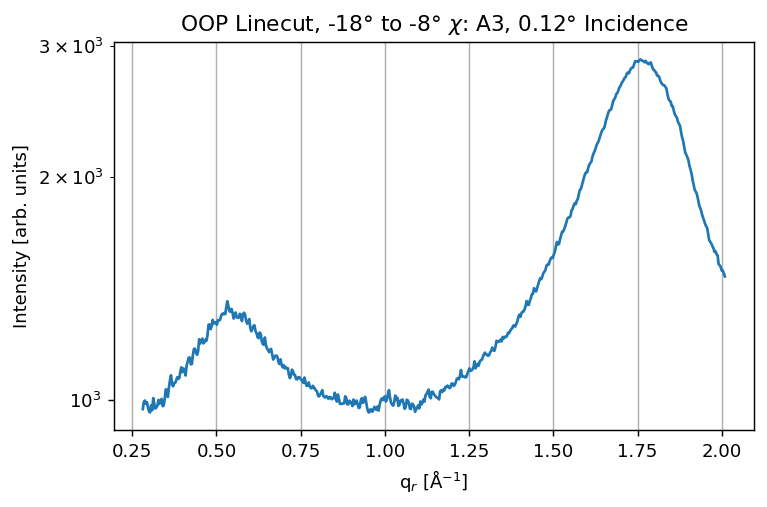

In [115]:
# Plot linecuts for selected chi ranges, here I've put both in plane and out of plane selections into the loop

for DA in tqdm(selected_DAs):
    # OOP
    chi_min = -18
    chi_max = -8
    OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.28,2.01)).sum('chi')
    OOP_linecut_DA.plot.line(figsize=(6,4))

    # A plot.line xarray plot does not return an AxesImage object like imshow does, so I use plt.gca() and plt.gcf() to access the axes & figure parameters
    ax = plt.gca()
    fig = plt.gcf()
    
    ax.set(title=f'OOP Linecut, {chi_min}° to {chi_max}° $\chi$: {DA.film}, {float(DA.incident_angle[2:])}° Incidence',
           yscale='log', ylabel='Intensity [arb. units]', xlabel='q$_r$ [Å$^{-1}$]')
    ax.grid(visible=True, which='major', axis='x')
    fig.set(tight_layout=True, dpi=130)
    
    plt.show()
    # fpath = outPath.joinpath('A1-3set_waxs/linecuts', f'OOP_{DA.film}_{chi_min}to{chi_max}chi_{DA.incident_angle}.csv')
    # print('Saving csv data...')
    # OOP_linecut_DA.to_dataframe('OOP_Intensity').to_csv(fpath)
    # print('Saved!')
    # fig.savefig(outPath.joinpath('A1-3set_waxs/linecuts', f'OOP_{DA.film}_{chi_min}to{chi_max}chi_{DA.incident_angle}.png'), dpi=150)
    plt.close('all')
    

### Line Fitting
Use lmfit to perform the linefits

In [74]:
from scipy import optimize, signal
from lmfit import models

In [75]:
def fit_plotter(q, I, out):
    """
    Plots a figure with 2 axes, the full fit on a log scale on the left and the components in normal scale on the right
    """
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set(size_inches=(12,4))
    
    ax1.plot(q, I, label='data')
    ax1.plot(q, out.best_fit, label='full_fit')
    ax1.set(xlabel='Q [Å$^{-1}$]', ylabel='Intensity [arb. units]')
    ax1.legend(loc='upper left')
    
    ax2.plot(q, I, label='data')
    ax2.plot(q, out.best_fit, label='full_fit')
    for key in out.eval_components():
        ax2.plot(q, out.eval_components()[key], label=f'{key}')
    ax2.set(xlabel='Q [Å$^{-1}$]')
    ax2.legend(loc='upper left')
    
    return (ax1, ax2), fig

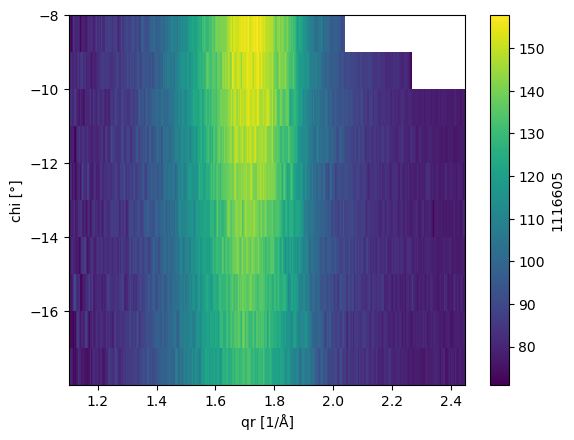

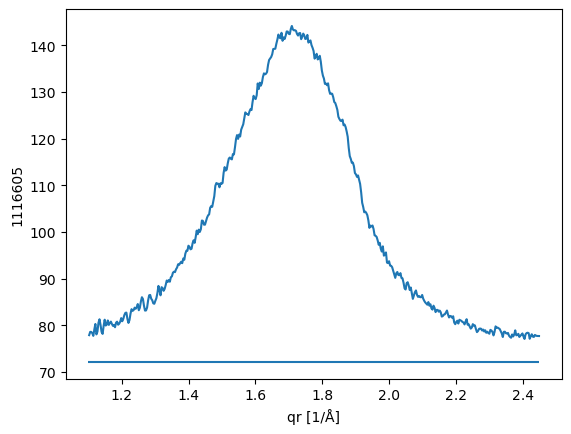

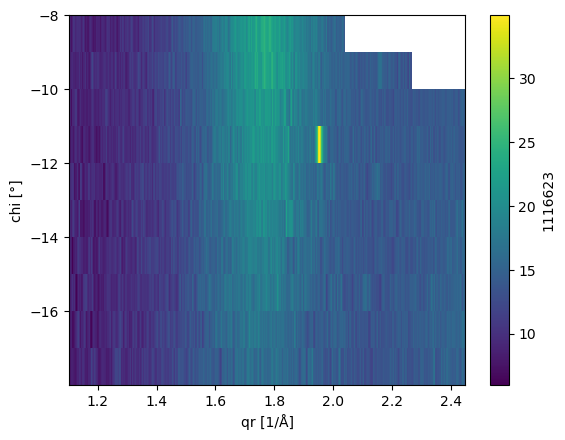

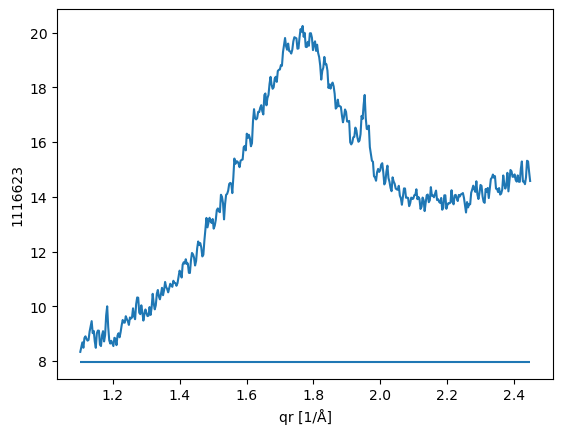

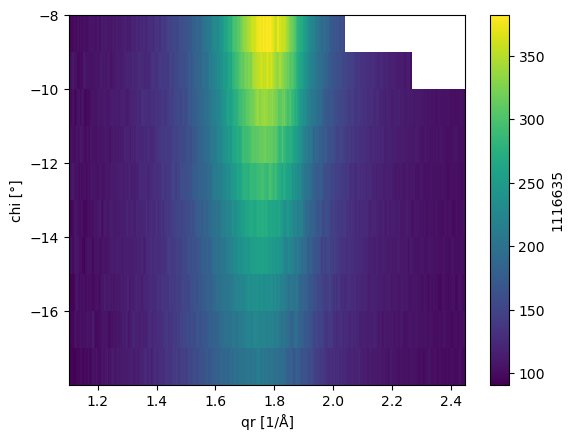

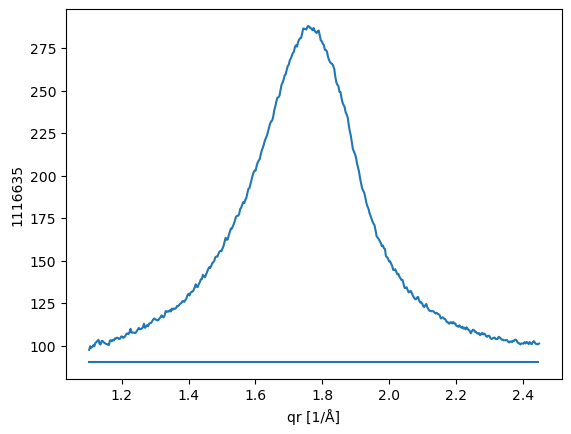

In [129]:
chi_min = -18
chi_max = -8

q_min = 1.1
q_max = 2.45

# points_x = [0.3, 2.6]

point_x = q_min


for DA in selected_DAs:
    
    # DA = selected_DAs[2].compute()
    DA = DA.compute()

    #     points_y = [float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(points_x[0]-0.01, points_x[0]+0.1)).mean('qr').mean('chi')), 
    #                 float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(points_x[1]-0.01, points_x[1]+0.1)).mean('qr').mean('chi'))]
    point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
    point_y = point_y - point_y*(0.08)


    DA.sel(chi=slice(chi_min, chi_max), qr=slice(q_min, q_max)).plot()
    plt.show()

    OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(q_min, q_max)).mean('chi')
    OOP_linecut_DA.plot()

    plt.hlines(point_y, xmin=q_min, xmax=q_max)

    plt.show()
    plt.close('all')

In [319]:
DA = selected_DAs[0].compute()
OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(q_min, q_max)).mean('chi')

point_x = q_min
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

#### Messy line fitting below

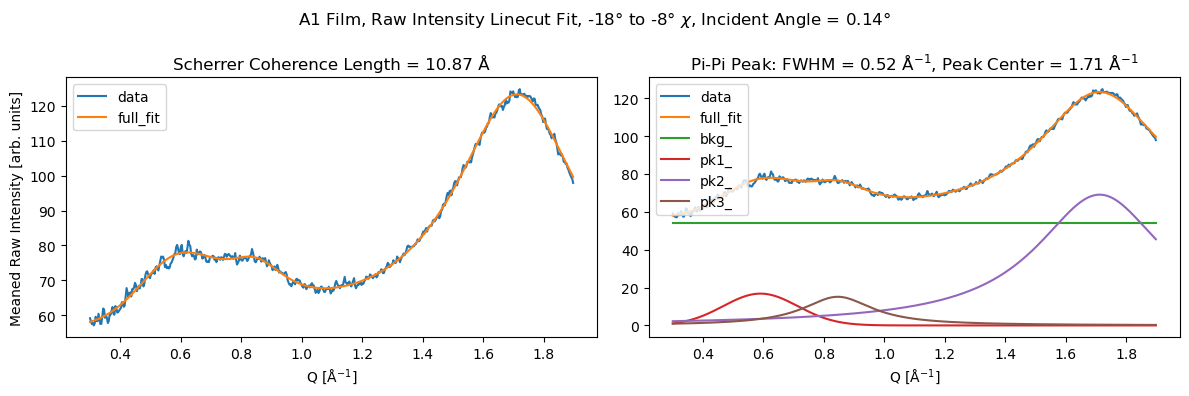

FWHM = 0.52, Lc = 10.87



{'pk3_amplitude': 6.628645549827721,
 'pk3_center': 0.8460813296491194,
 'pk3_sigma': 0.14036153820379704,
 'pk3_fraction': 0.9855229517235895,
 'pk2_amplitude': 56.02494972043485,
 'pk2_center': 1.7121340881519043,
 'pk2_sigma': 0.2581667040267879,
 'pk2_fraction': 0.9999999966618143,
 'pk1_amplitude': 5.192767600483572,
 'pk1_center': 0.5901832044804242,
 'pk1_sigma': 0.1451459041541796,
 'pk1_fraction': 4.4479309124767497e-11,
 'bkg_slope': 0.0,
 'bkg_intercept': 53.85495663888115}

In [133]:
# A1
intensity_type = 'raw'
if intensity_type == 'corr':
    DA = selected_corr_DAs[0].compute()
elif intensity_type == 'raw':
    DA = selected_raw_DAs[0].compute()
else:
    print('Must select intensity type')

OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.3, 1.9)).mean('chi')

point_x = 0.3
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

# Define all models to include in fitting
bkg_mod = models.LinearModel(prefix='bkg_')
pars = bkg_mod.make_params()
pars = bkg_mod.make_params(intercept=point_y, slope=0)
pars['bkg_intercept'].set(vary=False)
pars['bkg_slope'].set(vary=False)

pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
# pars = pk1_mod.make_params(center=0.55)
pars += pk1_mod.guess(y, x, center=0.55)
# pars['pk1_amplitude'].set(min=0.5)
pars['pk1_amplitude'].set(min=0)

# pk2_mod = models.LorentzianModel(prefix='pk2_')
pk2_mod = models.PseudoVoigtModel(prefix='pk2_')

pars += pk2_mod.guess(y, x, center=1.7)
# pars['pk2_center'].set(max = 0.62, min = 0.58)
# pars['pk2_sigma'].set(max = 0.03)
pars['pk2_amplitude'].set(min=0)

pk3_mod = models.PseudoVoigtModel(prefix='pk3_')
pars += pk3_mod.guess(y, x, center=0.8)
pars['pk3_center'].set(max=0.9, min = 0.7)
pars['pk3_amplitude'].set(min=0)


# Combine into full model
mod = bkg_mod + pk1_mod + pk2_mod + pk3_mod

# Run fit and store all info in a ModelResult object
out = mod.fit(y, pars, x=x)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
center = np.round(float(out.params['pk2_center']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

# Plot
axs, fig = fit_plotter(x, y, out)
fig.set(tight_layout=True)

if intensity_type == 'corr':
    axs[0].set(ylabel=f'Meaned (Intensity * sin($\chi$)) [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, sin($\chi$)-corrected Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')    
elif intensity_type =='raw':
    axs[0].set(ylabel=f'Meaned Raw Intensity [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, Raw Intensity Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')

fig.savefig(outPath.joinpath('A1-3set_waxs/linecut_fits', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
plt.show()


print(f'FWHM = {FWHM}, Lc = {Lc}\n')
display(out.best_values)

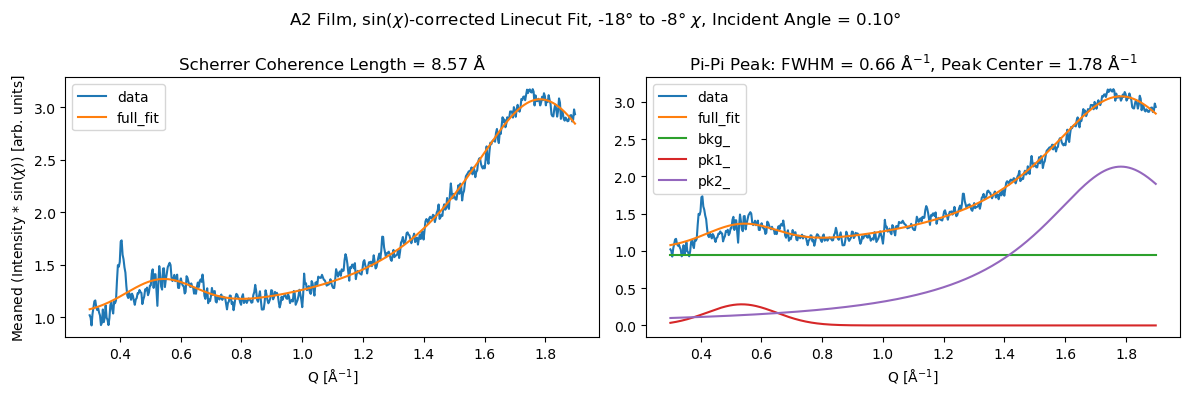

FWHM = 0.66, Lc = 8.57



{'pk2_amplitude': 2.199290844504003,
 'pk2_center': 1.7831498457856458,
 'pk2_sigma': 0.32850050299224054,
 'pk2_fraction': 0.9999999996741715,
 'pk1_amplitude': 0.08134803325274186,
 'pk1_center': 0.5349067220314082,
 'pk1_sigma': 0.13491931863823425,
 'pk1_fraction': 2.895375793565691e-07,
 'bkg_slope': 0.0,
 'bkg_intercept': 0.9435914703490863}

In [141]:
# A2
intensity_type = 'corr'
if intensity_type == 'corr':
    DA = selected_corr_DAs[1].compute()
elif intensity_type == 'raw':
    DA = selected_raw_DAs[1].compute()
else:
    print('Must select intensity type')
    
OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.3, 1.9)).mean('chi')

point_x = 0.3
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

# Define all models to include in fitting
bkg_mod = models.LinearModel(prefix='bkg_')
# pars = bkg_mod.make_params()
pars = bkg_mod.make_params(intercept=point_y, slope=0)
pars['bkg_intercept'].set(vary=False)
pars['bkg_slope'].set(vary=False)

pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
# pars = pk1_mod.make_params(center=0.55)
pars += pk1_mod.guess(y, x, center=0.55)
# pars['pk1_amplitude'].set(min=0.5)

pk2_mod = models.PseudoVoigtModel(prefix='pk2_')
pars += pk2_mod.guess(y, x, center=1.7)
# pars['pk2_center'].set(max = 0.62, min = 0.58)
# pars['pk2_sigma'].set(max = 0.03)
# pars['pk2_amplitude'].set(min=0.5)

# Combine into full model
mod = bkg_mod + pk1_mod + pk2_mod

# Run fit and store all info in a ModelResult object
out = mod.fit(y, pars, x=x)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
center = np.round(float(out.params['pk2_center']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

# Plot
axs, fig = fit_plotter(x, y, out)
fig.set(tight_layout=True)

if intensity_type == 'corr':
    axs[0].set(ylabel=f'Meaned (Intensity * sin($\chi$)) [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, sin($\chi$)-corrected Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')    
elif intensity_type =='raw':
    axs[0].set(ylabel=f'Meaned Raw Intensity [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, Raw Intensity Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')

# fig.savefig(outPath.joinpath('A1-3set_waxs/linecut_fits', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
plt.show()

print(f'FWHM = {FWHM}, Lc = {Lc}\n')
display(out.best_values)

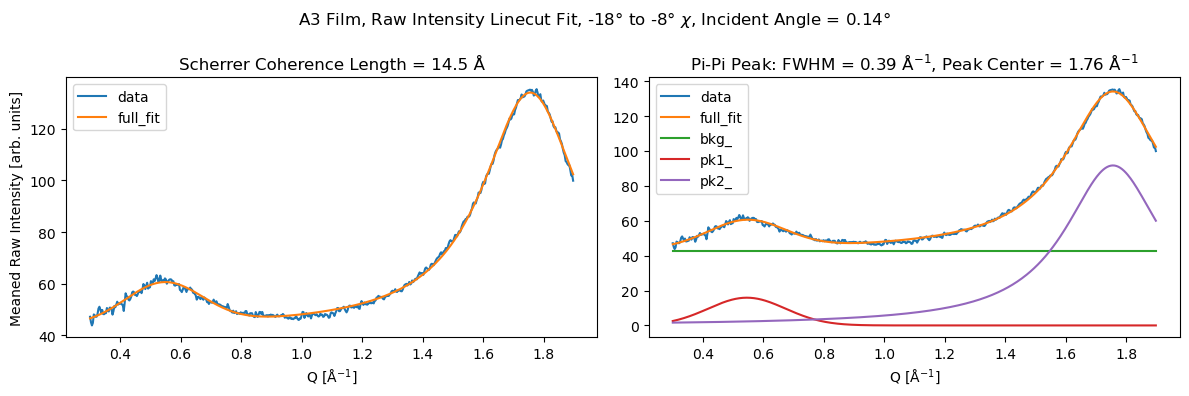

FWHM = 0.39, Lc = 14.5



{'pk2_amplitude': 55.98325237218668,
 'pk2_center': 1.7560663978580937,
 'pk2_sigma': 0.19494705440439986,
 'pk2_fraction': 0.9934501681389136,
 'pk1_amplitude': 5.088825261959556,
 'pk1_center': 0.5452864620757656,
 'pk1_sigma': 0.1503687839753809,
 'pk1_fraction': 1.8923266897896696e-08,
 'bkg_slope': 0.0,
 'bkg_intercept': 42.38903088378906}

In [135]:
# A3
intensity_type = 'raw'
if intensity_type == 'corr':
    DA = selected_corr_DAs[2].compute()
elif intensity_type == 'raw':
    DA = selected_raw_DAs[2].compute()
else:
    print('Must select intensity type')
    
OOP_linecut_DA = DA.sel(chi=slice(chi_min, chi_max), qr=slice(0.3, 1.9)).mean('chi')

point_x = 0.3
point_y = float(DA.sel(chi=slice(chi_min, chi_max), qr=slice(point_x-0.01, point_x+0.01)).mean('qr').mean('chi'))
point_y = point_y - point_y*(0.08)

x = OOP_linecut_DA.qr.data
y = OOP_linecut_DA.data

# Define all models to include in fitting
bkg_mod = models.LinearModel(prefix='bkg_')
# pars = bkg_mod.make_params()
pars = bkg_mod.make_params(intercept=point_y, slope=0)
pars['bkg_intercept'].set(vary=False)
pars['bkg_slope'].set(vary=False)

pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
# pars = pk1_mod.make_params(center=0.55)
pars += pk1_mod.guess(y, x, center=0.55)
# pars['pk1_amplitude'].set(min=0.5)

pk2_mod = models.PseudoVoigtModel(prefix='pk2_')
pars += pk2_mod.guess(y, x, center=1.7)
# pars['pk2_center'].set(max = 0.62, min = 0.58)
# pars['pk2_sigma'].set(max = 0.03)
# pars['pk2_amplitude'].set(min=0.5)

# Combine into full model
mod = bkg_mod + pk1_mod + pk2_mod

# Run fit and store all info in a ModelResult object
out = mod.fit(y, pars, x=x)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
center = np.round(float(out.params['pk2_center']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

# Plot
axs, fig = fit_plotter(x, y, out)
fig.set(tight_layout=True)
FWHM = np.round(float(out.params['pk2_fwhm']), 2)
Lc = np.round((2*np.pi*0.9)/FWHM, 2)

if intensity_type == 'corr':
    axs[0].set(ylabel=f'Meaned (Intensity * sin($\chi$)) [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, sin($\chi$)-corrected Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')    
elif intensity_type =='raw':
    axs[0].set(ylabel=f'Meaned Raw Intensity [arb. units]', title=f'Scherrer Coherence Length = {Lc} Å')
    axs[1].set(title=f'Pi-Pi Peak: FWHM = {FWHM}' + ' Å$^{-1}$, ' + f'Peak Center = {center}' + ' Å$^{-1}$')
    fig.suptitle(f'{DA.film} Film, Raw Intensity Linecut Fit, {chi_min}° to {chi_max}° $\chi$, Incident Angle = {DA.incident_angle[2:-1]}°')

fig.savefig(outPath.joinpath('A1-3set_waxs/linecut_fits', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
plt.show()

print(f'FWHM = {FWHM}, Lc = {Lc}\n')
display(out.best_values)


### Pole Figures

In [71]:
# A way to select dataarrays based on attribute values:
selected_raw_DAs = [da for da in DS.data_vars.values() if 
                # da.attrs['incident_angle'] == 'th0.140' and 
                da.attrs['film'] in ['A1', 'A2', 'A3']]

selected_corr_DAs = [da for da in corr_DS.data_vars.values() if 
                # da.attrs['incident_angle'] == 'th0.140' and 
                da.attrs['film'] in ['A1', 'A2', 'A3']]

print(len(selected_raw_DAs))
print(len(selected_corr_DAs))

9
9


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

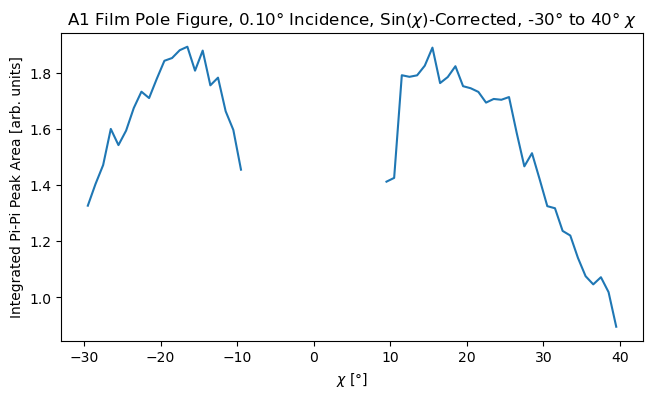

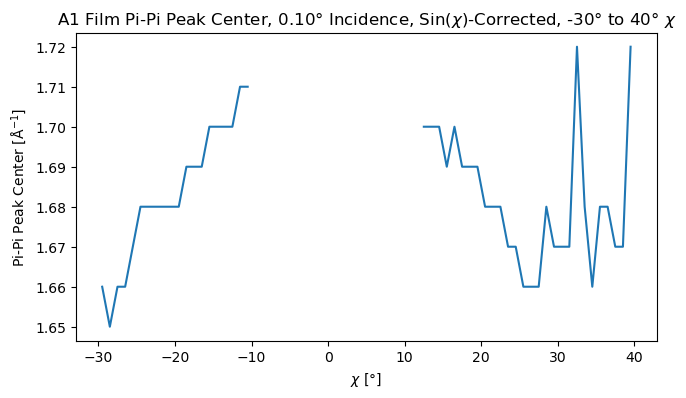

  0%|          | 0/70 [00:00<?, ?it/s]

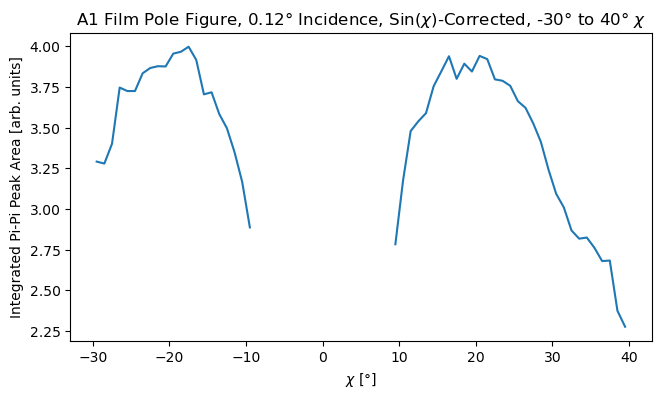

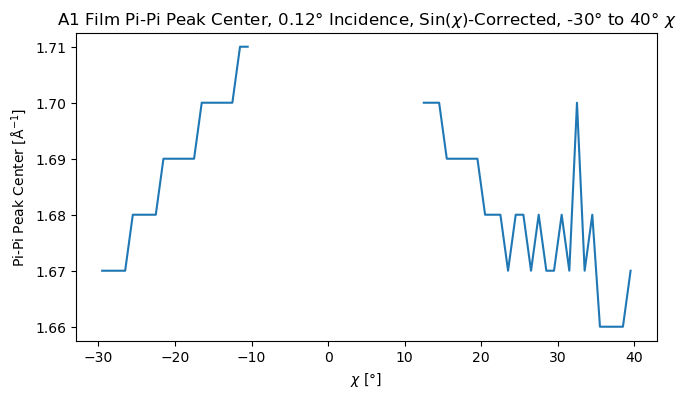

  0%|          | 0/70 [00:00<?, ?it/s]

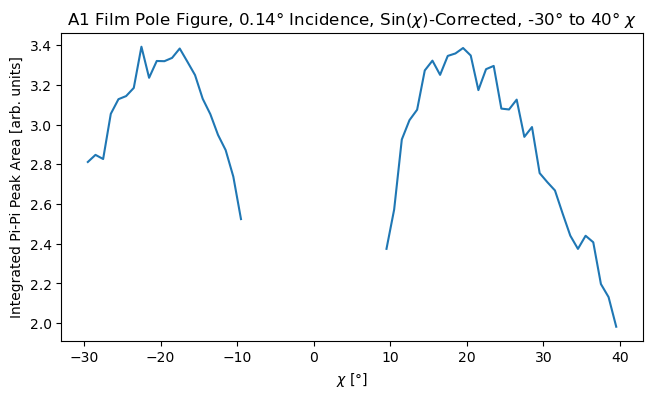

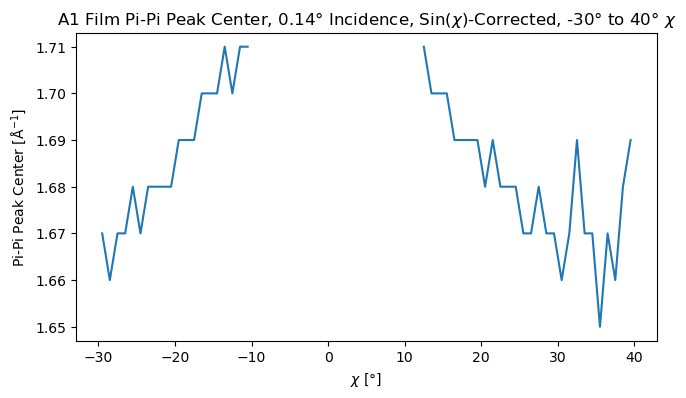

  0%|          | 0/70 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [144]:
q_max = 2.45
q_min = 1.1
chi_min = -30
chi_max = 40

intensity_type = 'corr'

if intensity_type == 'raw':
    selected_DAs = selected_raw_DAs
elif intensity_type == 'corr':
    selected_DAs = selected_corr_DAs
    
for DA in tqdm(selected_DAs):
    chis = DA.chi.sel(chi=slice(chi_min,chi_max)).data
    
    peak_areas = np.array([])
    peak_centers = np.array([])
    
    for chi in tqdm(chis):
        sliced_DA = DA.sel(qr=slice(q_min, q_max), chi=float(chi))

        points_x = [1.15, 2.3]
        points_y = [float(sliced_DA.sel(qr=slice(points_x[0]-0.05, points_x[0]+0.05)).mean('qr')), 
                    float(sliced_DA.sel(qr=slice(points_x[1]-0.2, points_x[1]+0.2)).mean('qr'))]
        m = (points_y[1]-points_y[0])/(points_x[1]-points_x[0])
        b = points_y[1] - (m*points_x[1])
        y_fit = np.polyval([m, b], sliced_DA.qr)
        
        sub_sliced_DA = sliced_DA-y_fit

        peak_area = sub_sliced_DA.sel(qr=slice(1.5,1.8)).integrate('qr')
        peak_areas = np.append(peak_areas, float(peak_area))
        
        # Run lmfit per chi around pi-pi if desired
        # Build model 
        x = sub_sliced_DA.qr.data
        y = sub_sliced_DA.data
        pk1_mod = models.PseudoVoigtModel(prefix='pk1_')
        pars = pk1_mod.make_params(center=1.7)
        pars += pk1_mod.guess(y, x, center=1.7)
        # pars['pk1_amplitude'].set(min=0.5)

        # Run fit
        try: 
            out = pk1_mod.fit(y, pars, x=x)
            peak_centers = np.append(peak_centers, np.round(float(out.params['pk1_center']), 2))
        except ValueError:
            peak_centers = np.append(peak_centers, np.nan)
            
        
#         # Plot linecuts for each chi
#         fig, ax = plt.subplots()
#         sliced_DA.plot(ax=ax)
#         ax.plot(points_x, points_y)
#         plt.show()
        
# #         axs, fig = fit_plotter(x, y, out)        
# #         sub_sliced_DA.plot(ax=ax)

# #         ax.set(xlim=(q_min,q_max))
# #         plt.show()

#         plt.close('all')

    # fig, axs = plt.subplots(1,2, figsize=(12,4))
    # axs[0].plot(chis, peak_areas)
    # axs[1].plot(chis, peak_centers)
    
    # Pole figure plot
    fig, ax = plt.subplots(figsize=(7.5,4))
    ax.plot(chis, peak_areas)
    if intensity_type == 'corr':
        ax.set(title=f'{DA.film} Film Pole Figure, {DA.incident_angle[2:-1]}° Incidence, Sin($\chi$)-Corrected, {chi_min}° to {chi_max}° $\chi$')
    elif intensity_type =='raw':
        ax.set(title=f'{DA.film} Film Pole Figure, {DA.incident_angle[2:-1]}° Incidence, Raw Intensity: {chi_min}° to {chi_max}° $\chi$')
    ax.set(xlabel='$\chi$ [°]', ylabel='Integrated Pi-Pi Peak Area [arb. units]')
    # fig.savefig(outPath.joinpath('A1-3set_waxs/pole_figures', f'{DA.film}_{intensity_type}_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
    plt.show()
    
    # Peak center plot
    fig, ax = plt.subplots(figsize=(7.5,4))
    ax.plot(chis, peak_centers)
    if intensity_type == 'corr':
        ax.set(title=f'{DA.film} Film Pi-Pi Peak Center, {DA.incident_angle[2:-1]}° Incidence, Sin($\chi$)-Corrected, {chi_min}° to {chi_max}° $\chi$')
    elif intensity_type =='raw':
        ax.set(title=f'{DA.film} Film Pi-Pi Peak Center, {DA.incident_angle[2:-1]}° Incidence, Raw Intensity: {chi_min}° to {chi_max}° $\chi$')
    ax.set(xlabel='$\chi$ [°]', ylabel='Pi-Pi Peak Center [Å$^{-1}$]')
    # fig.savefig(outPath.joinpath('A1-3set_waxs/pole_figures', f'{DA.film}_{intensity_type}_peak-center_{DA.incident_angle}_{chi_min}to{chi_max}chi.png'), dpi=120)
    plt.show()    
    
    
    plt.close('all')